In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [27]:
df = pd.read_csv("/content/credit_card_transactions_dataset.csv")
df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495.0,"Psychologist, counselling",09-03-88,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.0
1,1,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,21-06-78,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,NaN
2,2,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154.0,Nature conservation officer,19-01-62,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.0
3,3,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939.0,Patent attorney,12-01-67,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,NaN
4,4,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99.0,Dance movement psychotherapist,28-03-86,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964051,964051,4.671730e+15,fraud_Kuhic Inc,grocery_pos,134.81,Kenneth,Edwards,M,3653 Ryan Crossroad,Andrews,...,-85.6067,2304.0,Retail banker,25-07-55,b754329cb9c3bed4a89bf5c489b02b65,1.359015e+09,40.137390,-85.360321,0.0,47302.0
964052,964052,4.586810e+15,"fraud_Schaefer, Maggio and Daugherty",gas_transport,28.09,Michelle,Gregory,F,6983 Carrillo Isle,Edisto Island,...,-80.3070,2408.0,"Sales professional, IT",05-07-97,0d45a804a0043985b217bce14b2197e6,1.359015e+09,31.848343,-80.284817,0.0,NaN
964053,964053,3.459340e+14,"fraud_Schaefer, Maggio and Daugherty",gas_transport,50.11,Carol,Dillon,F,27479 Reeves Dale,Whaleyville,...,-75.2811,718.0,Regulatory affairs officer,19-03-85,50faf62649d983b5d90a34585a7e9b96,1.359015e+09,37.756939,-75.120531,0.0,NaN
964054,964054,3.597340e+15,fraud_Bernhard Inc,gas_transport,65.47,Linda,Gonzalez,F,17667 Price Spur Apt. 366,Glen Rock,...,-76.7477,7565.0,Insurance claims handler,08-03-52,c88185f71b20e40c0bc5d401164514d8,1.359015e+09,39.130555,-77.190422,0.0,20877.0


In [28]:
print(df.columns)

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'merch_zipcode'],
      dtype='object')


In [34]:
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city',
                   'state', 'zip', 'lat', 'long', 'trans_num', 'unix_time',
                   'merch_lat', 'merch_long', 'merch_zipcode']

In [35]:
df1 = df.drop(columns=columns_to_drop)

In [36]:
df1['dob'] = pd.to_datetime(df1['dob'])
df1['age'] = (pd.to_datetime('today') - df1['dob']).dt.days // 365
df1 = df1.drop(columns=['dob'])

print(df1.head())

<ipython-input-36-5f5175f4d34e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['dob'] = pd.to_datetime(df1['dob'])


                             merchant       category     amt gender  city_pop  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F    3495.0   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F     149.0   
2                fraud_Lind-Buckridge  entertainment  220.11      M    4154.0   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M    1939.0   
4                 fraud_Keeling-Crist       misc_pos   41.96      M      99.0   

                                 job  is_fraud   age  
0          Psychologist, counselling       0.0  36.0  
1  Special educational needs teacher       0.0  46.0  
2        Nature conservation officer       0.0 -38.0  
3                    Patent attorney       0.0 -44.0  
4     Dance movement psychotherapist       0.0  38.0  


In [37]:
print(df1.columns)

Index(['merchant', 'category', 'amt', 'gender', 'city_pop', 'job', 'is_fraud',
       'age'],
      dtype='object')


In [38]:
label_encoder = LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['job'] = label_encoder.fit_transform(df1['job'])
df1['category'] = label_encoder.fit_transform(df1['category'])
df1['merchant'] = label_encoder.fit_transform(df1['merchant'])

In [39]:
scaler = StandardScaler()
df1[['amt', 'age']] = scaler.fit_transform(df1[['amt', 'age']])

In [40]:
print(df1['is_fraud'].isnull().sum())

df1.dropna(subset=['is_fraud'], inplace=True)

X = df1.drop(columns=['is_fraud'])
y = df1['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

1


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9942378806188443
Confusion Matrix:
 [[191700      1]
 [  1110      0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    191701
         1.0       0.00      0.00      0.00      1110

    accuracy                           0.99    192811
   macro avg       0.50      0.50      0.50    192811
weighted avg       0.99      0.99      0.99    192811



In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9974638376441178


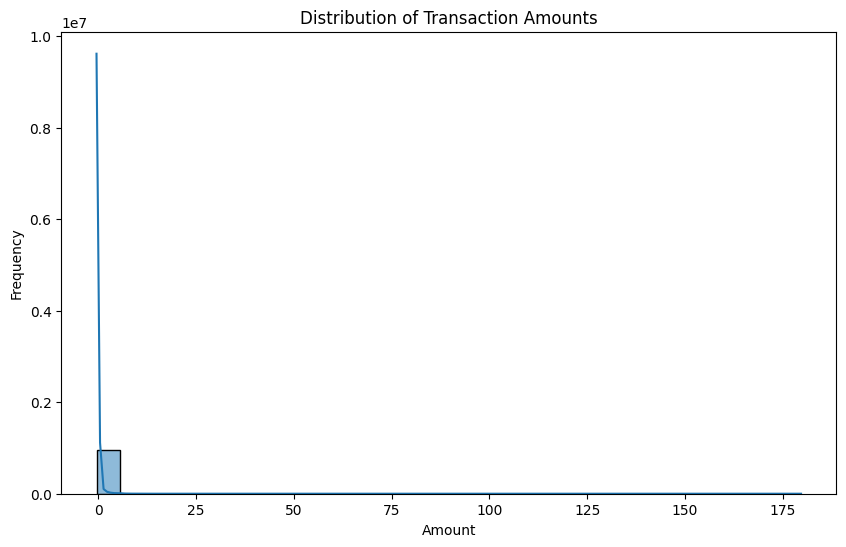

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

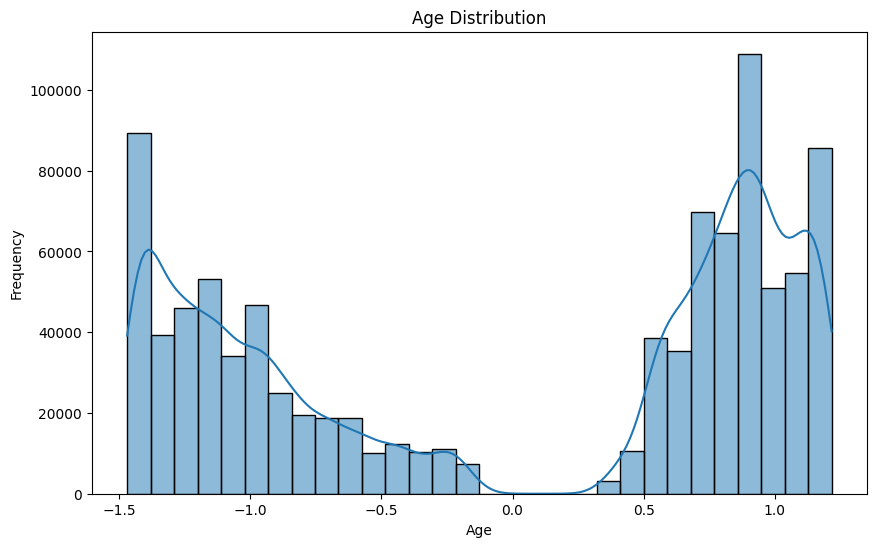

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

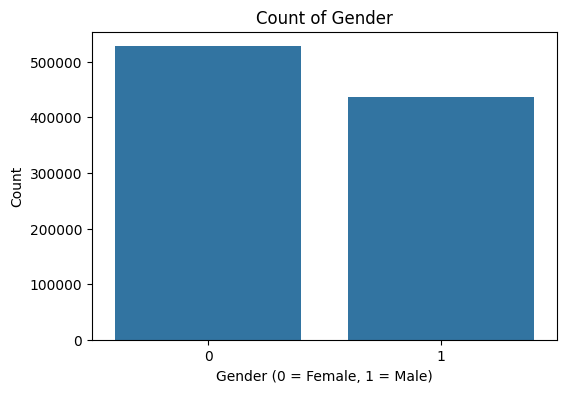

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df1)
plt.title('Count of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

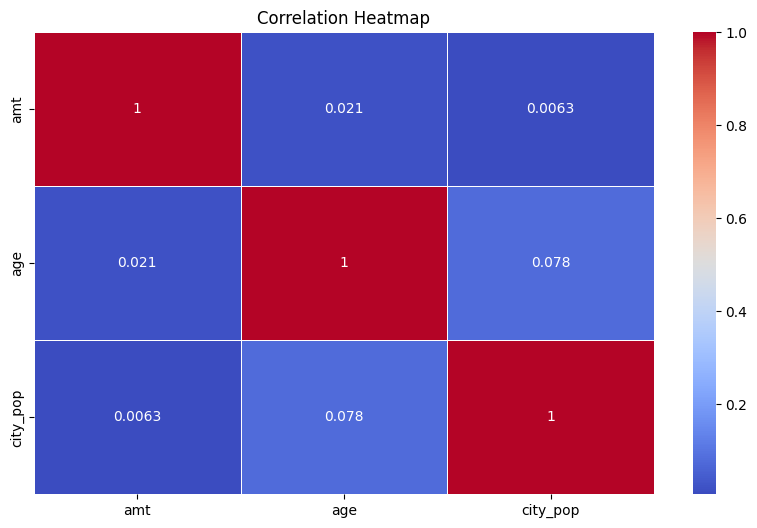

In [49]:
plt.figure(figsize=(10, 6))
correlation = df1[['amt', 'age', 'city_pop']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

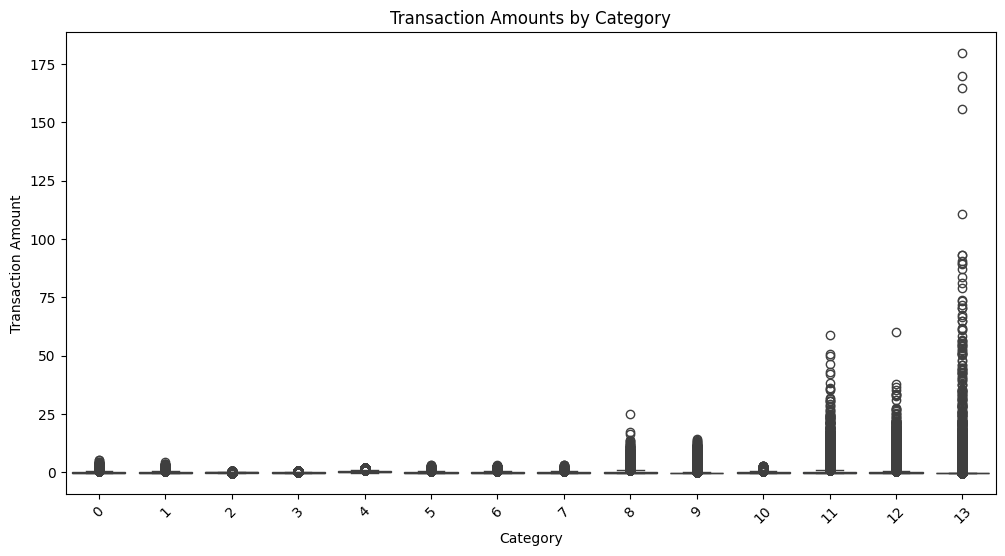

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=df1)
plt.title('Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

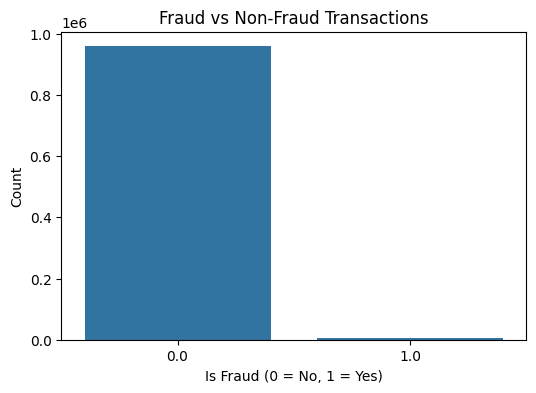

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df1)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

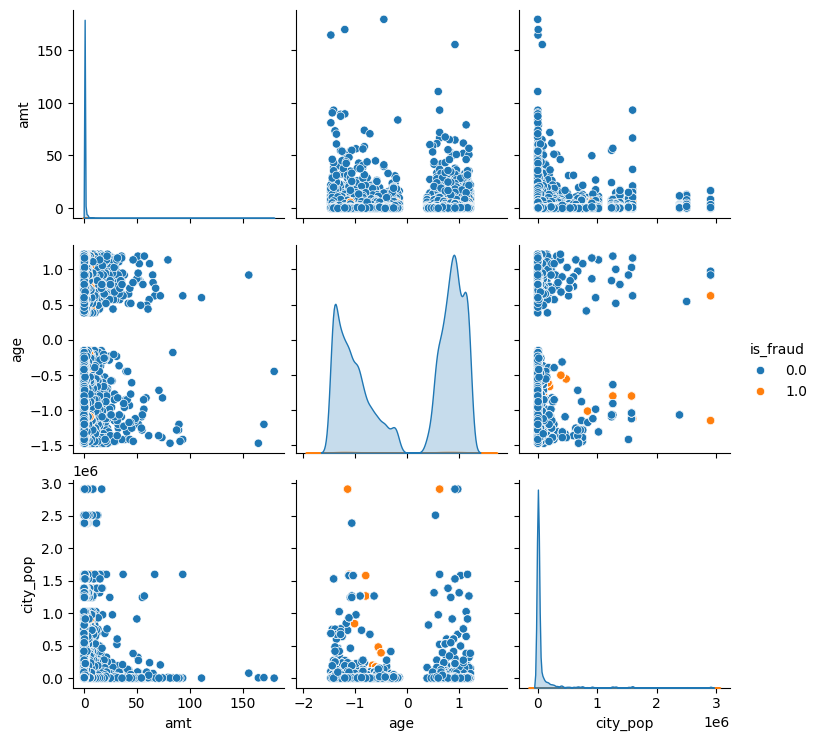

In [55]:
sns.pairplot(df1[['amt', 'age', 'city_pop', 'is_fraud']], hue='is_fraud')
plt.show()